# FAERS Public dataset download

### Importing all the necessary libraries

In [105]:

import geopandas as gpd

import pandas as pd
#import vaex as vd
import numpy as np
from shapely.geometry import Point

#For data handling and munging. This is an extremely powerful tool
#for working with data in a spreadsheet-like format. If you’re familiar with R data.frames, then you’ll love pandas.
import fiona
#fiona - For making it easy to read/write geospatial data formats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#for plotting

import os
#sys library

from functools import reduce

In [106]:
#importing
#requesting files over the internet
#import requests
import urllib.request

#unpacking zipfiles
import zipfile
import tarfile
import urllib.request, shutil


###mounting drive**

In [107]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\VAERS_unzip")

## Importing latest FAERS dataset from openFDA api


#####change files names here and column names


In [108]:
df1 = pd.read_csv('2021VAERSDATA.csv',error_bad_lines=False, encoding='ISO-8859-1')
df2 = pd.read_csv('2021VAERSSYMPTOMS.csv', encoding="ISO-8859-1")#,delimiter="$",error_bad_lines=False, encoding='utf-8')
df3 = pd.read_csv('2021VAERSVAX.csv', encoding="ISO-8859-1")#,delimiter="$",error_bad_lines=False, encoding='utf-8')

#df1.head()  


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [109]:
df4 =df1.merge(df2, left_on='VAERS_ID', right_on='VAERS_ID', how='inner')
df =df4.merge(df3, left_on='VAERS_ID', right_on='VAERS_ID', how='inner')
#df.drop(['VAX_TYPE_y','VAX_MANU_y','VAX_DOSE_SERIES_y','VAX_ROUTE_y','VAX_SITE_y','VAX_NAME_y', 'VAX_LOT_y'], axis=1, inplace=True)
#df.rename(columns={"VAX_TYPE_x": "VAX_TYPE", "VAX_MANU_x": "VAX_MANU", "VAX_DOSE_SERIES_x": "VAX_DOSE_SERIES", "VAX_ROUTE_x": "VAX_ROUTE", 
               #    "VAX_SITE_x": "VAX_SITE", "VAX_NAME_x": "VAX_NAME", "VAX_LOT_x": "VAX_LOT"}, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300916 entries, 0 to 300915
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         300916 non-null  int64  
 1   RECVDATE         300916 non-null  object 
 2   STATE            273728 non-null  object 
 3   AGE_YRS          280254 non-null  float64
 4   CAGE_YR          255894 non-null  float64
 5   CAGE_MO          678 non-null     float64
 6   SEX              300916 non-null  object 
 7   RPT_DATE         233 non-null     object 
 8   SYMPTOM_TEXT     300881 non-null  object 
 9   DIED             6768 non-null    object 
 10  DATEDIED         6344 non-null    object 
 11  L_THREAT         8045 non-null    object 
 12  ER_VISIT         39 non-null      object 
 13  HOSPITAL         25824 non-null   object 
 14  HOSPDAYS         18483 non-null   float64
 15  X_STAY           262 non-null     object 
 16  DISABLE          5512 non-null    obje

In [110]:
df.head()
df.VAX_NAME.unique()
df_covid = df[df.VAX_NAME.str.contains('COVID19', na=False, regex=True)]
df_covid.VAX_NAME.unique()
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298421 entries, 0 to 300915
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         298421 non-null  int64  
 1   RECVDATE         298421 non-null  object 
 2   STATE            271733 non-null  object 
 3   AGE_YRS          278415 non-null  float64
 4   CAGE_YR          254409 non-null  float64
 5   CAGE_MO          450 non-null     float64
 6   SEX              298421 non-null  object 
 7   RPT_DATE         166 non-null     object 
 8   SYMPTOM_TEXT     298386 non-null  object 
 9   DIED             6525 non-null    object 
 10  DATEDIED         6139 non-null    object 
 11  L_THREAT         7971 non-null    object 
 12  ER_VISIT         28 non-null      object 
 13  HOSPITAL         25362 non-null   object 
 14  HOSPDAYS         18220 non-null   float64
 15  X_STAY           256 non-null     object 
 16  DISABLE          5296 non-null    obje

##### data management (drugname column)

In [111]:

df_covid['VAX_NAME']= df_covid['VAX_NAME'].str.lower()
#############################

df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.strip()
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.strip(',')
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.replace(u"/",", ")
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.replace(u"\\\\", ", ")
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.replace(u"' ","'")
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.replace('\n',"")
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.replace('.',"")
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.replace('\n ',"")
df_covid['VAX_NAME'] = [''.join(c.split()) for c in df_covid['VAX_NAME'].astype(str)]
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.translate({None: ",!.; ''-@!%^&*)("})

#

<ipython-input-111-6bc74efa5484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['VAX_NAME']= df_covid['VAX_NAME'].str.lower()
<ipython-input-111-6bc74efa5484>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['VAX_NAME'] = df_covid['VAX_NAME'].str.strip()
<ipython-input-111-6bc74efa5484>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [112]:
df_covid.VAX_NAME.unique()
#df_covid.head()

array(['covid19(covid19(moderna))', 'covid19(covid19(pfizer-biontech))',
       'covid19(covid19(unknown))', 'covid19(covid19(janssen))'],
      dtype=object)

In [113]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset")
country_file_url = 'https://opendata.arcgis.com/datasets/2b93b06dc0dc4e809d3c8db5cb96ba69_0.zip'
USstate_file_url = 'https://opendata.arcgis.com/datasets/1612d351695b467eba75fdf82c10884f_0.zip'
file_name = 'USState'+'.zip'

with urllib.request.urlopen(USstate_file_url) as response, open(file_name, 'wb') as out_file:
  shutil.copyfileobj(response, out_file)

print('zipfile download complete')

file_name = 'USstate'+'.zip'
print(file_name)

os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset")
import zipfile
zip_ref = zipfile.ZipFile(file_name)
zip_ref.printdir() 
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset")
zip_ref.extractall('USstate')
zip_ref.close()
print('zipfile unzip complete')

zipfile download complete
USstate.zip
File Name                                             Modified             Size
US_State_Boundaries.shp                        2021-04-29 17:27:40     10798756
US_State_Boundaries.shx                        2021-04-29 17:27:40          524
US_State_Boundaries.dbf                        2021-04-29 17:27:40         9980
US_State_Boundaries.cpg                        2021-04-29 17:27:38            5
US_State_Boundaries.prj                        2021-04-29 17:27:38          145
zipfile unzip complete


#####country shapefile - download and joining

In [114]:

USstate_shp = gpd.read_file(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset\USState\US_State_Boundaries.shp")
USstate_shp['STATE_ABBR'] = USstate_shp['STATE_ABBR'].str.strip()#ISOSHRTNAM
USstate_shp['STATE_ABBR'] = USstate_shp['STATE_ABBR'].str.upper()

#USstate_shp = USstate_shp[USstate_shp['STATE_ABBR'].str.contains('|'.join(europe),case=False, na=False, regex=True)]
USstate_shp['centroid'] = USstate_shp['geometry'].centroid
USstate_shp['coords'] = USstate_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
USstate_shp['coords'] = [coords[0] for coords in USstate_shp['coords']]
USstate_shp['coords']

USstate_shp['Lon'] = USstate_shp.centroid.x
USstate_shp['Lat'] = USstate_shp.centroid.y
USstate_shp
USstate_shp = USstate_shp.reset_index()
USstate_shp.columns
#world_shp.head()
USstate_shp[['STATE_ABBR','NAME','geometry','coords']]

<ipython-input-114-5adda3a24122>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  USstate_shp['centroid'] = USstate_shp['geometry'].centroid
<ipython-input-114-5adda3a24122>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  USstate_shp['Lon'] = USstate_shp.centroid.x
<ipython-input-114-5adda3a24122>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  USstate_shp['Lat'] = USstate_shp.centroid.y


,STATE_ABBR,NAME,geometry,coords
0,AR,Arkansas,"POLYGON ((-94.29160 36.49930, -94.28957 36.499...","(-92.49470012915145, 34.75202049817515)"
1,AZ,Arizona,"POLYGON ((-110.49382 37.00377, -110.49091 37.0...","(-111.6690476119908, 34.1677407834045)"
2,CO,Colorado,"POLYGON ((-106.37558 41.00072, -106.35240 40.9...","(-105.54942901754964, 38.99647046448865)"
3,IA,Iowa,"POLYGON ((-91.24677 43.50082, -91.22239 43.500...","(-93.1505941655656, 41.938430482692354)"
4,IL,Illinois,"POLYGON ((-90.43711 42.50713, -90.42638 42.507...","(-89.45102687196676, 39.74219149178065)"
5,IN,Indiana,"POLYGON ((-85.93071 41.75977, -85.83727 41.759...","(-86.17367333723593, 39.7656998597308)"
6,KS,Kansas,"POLYGON ((-101.45228 40.00268, -101.44893 40.0...","(-98.32869221546662, 38.49792648635845)"
7,MO,Missouri,"POLYGON ((-91.72747 40.61144, -91.72006 40.601...","(-92.49235332692504, 38.3038809865085)"
8,NE,Nebraska,"POLYGON ((-103.24902 43.00076, -103.24902 43.0...","(-100.02958358774636, 41.49872197958055)"
9,NM,New Mexico,"POLYGON ((-103.01356 37.00021, -103.00216 37.0...","(-106.04549540534425, 34.16562056479525)"


In [115]:
df_covid_ =df_covid.merge(USstate_shp, left_on='STATE', right_on='STATE_ABBR', how='inner')
df_covid_.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SQ_MILES,PRIM_MILES,Shape_Leng,Shape__Are,Shape__Len,geometry,centroid,coords,Lon,Lat
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,264754.3,5589.9,87.13256,65.140605,87.132931,"MULTIPOLYGON (((-95.08752 29.76578, -95.09308 ...",POINT (-99.35875 31.49450),"(-99.68315474945254, 31.16874844117975)",-99.358755,31.494504
1,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,264754.3,5589.9,87.13256,65.140605,87.132931,"MULTIPOLYGON (((-95.08752 29.76578, -95.09308 ...",POINT (-99.35875 31.49450),"(-99.68315474945254, 31.16874844117975)",-99.358755,31.494504
2,916702,01/01/2021,TX,70.0,70.0,NaN,F,NaN,body aches and stomach ache,NaN,...,264754.3,5589.9,87.13256,65.140605,87.132931,"MULTIPOLYGON (((-95.08752 29.76578, -95.09308 ...",POINT (-99.35875 31.49450),"(-99.68315474945254, 31.16874844117975)",-99.358755,31.494504
3,916703,01/01/2021,TX,60.0,60.0,NaN,F,NaN,Posterior vitreous detachment,NaN,...,264754.3,5589.9,87.13256,65.140605,87.132931,"MULTIPOLYGON (((-95.08752 29.76578, -95.09308 ...",POINT (-99.35875 31.49450),"(-99.68315474945254, 31.16874844117975)",-99.358755,31.494504
4,916704,01/01/2021,TX,35.0,35.0,NaN,F,NaN,"Moderna COVID?19 Vaccine EUA Arm severe pain,...",NaN,...,264754.3,5589.9,87.13256,65.140605,87.132931,"MULTIPOLYGON (((-95.08752 29.76578, -95.09308 ...",POINT (-99.35875 31.49450),"(-99.68315474945254, 31.16874844117975)",-99.358755,31.494504


In [116]:
df_covid_moderna = df_covid[df_covid.VAX_NAME.str.contains('moderna', na=False, regex=True)]
df_covid_pfizer = df_covid[df_covid.VAX_NAME.str.contains('pfizer', na=False, regex=True)]
df_covid_janssen = df_covid[df_covid.VAX_NAME.str.contains('janssen', na=False, regex=True)]
df_covid_janssen[['SYMPTOM_TEXT', 'SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]


cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4','SYMPTOM5']
df_covid_pfizer["PT"] = df_covid_pfizer[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
df_covid_moderna["PT"] = df_covid_moderna[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
df_covid_janssen["PT"] = df_covid_janssen[cols].apply(lambda x: ','.join(x.dropna()), axis=1)

<ipython-input-116-806349ae625e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_pfizer["PT"] = df_covid_pfizer[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
<ipython-input-116-806349ae625e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_moderna["PT"] = df_covid_moderna[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
<ipython-input-116-806349ae625e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [117]:
df_covid_moderna.STATE.unique()

array(['TX', 'CA', 'WA', 'NV', 'KS', 'OH', 'TN', 'VA', 'NC', 'NY', 'GA',
       'NJ', nan, 'MD', 'ME', 'MA', 'CT', 'FL', 'MI', 'OK', 'AR', 'ID',
       'PA', 'NH', 'MO', 'CO', 'NE', 'MN', 'IN', 'AL', 'MT', 'RI', 'UT',
       'MS', 'IA', 'WV', 'IL', 'WI', 'OR', 'PR', 'KY', 'ND', 'SC', 'AZ',
       'VT', 'SD', 'LA', 'HI', 'NM', 'WY', 'AK', 'DE', 'DC', 'VI', 'GU',
       'AS', 'FM', 'XV', 'XB'], dtype=object)

In [118]:
#df['a+b'] = df.apply(lambda x: x.str.cat(sep=''), axis=1)

In [119]:
import gc
collected = gc.collect()
gc.collect()

print ("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 66 objects.


##### data management (joining all dataframes together)

In [120]:
df_covid_janssen['ONSET_DATE'].head()

154572    03/03/2021
157113    03/02/2021
157207    03/03/2021
157208    03/03/2021
157209    03/03/2021
Name: ONSET_DATE, dtype: object

##### data management (time column)

In [121]:
#df_merged0 = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0.pkl")

df_covid_janssen['ONSET_DATE'] = df_covid_janssen['ONSET_DATE'].astype(str).replace('\.0', '', regex=True)
df_covid_janssen['ONSET_DATE'] = df_covid_janssen['ONSET_DATE'].astype(str)
df_covid_janssen.fillna(0)
df_covid_janssen.replace(np.nan, 0, inplace=True)

df_covid_janssen['ONSET_DATE'] = pd.to_datetime(df_covid_janssen.ONSET_DATE, errors='coerce')
#df_merged0['event_dt1'] = df_merged0['event_dt'].dt.strftime('%Y%m%d')
#df_merged0.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0.pkl") 

df_covid_janssen.head()


df_covid_pfizer['ONSET_DATE'] = df_covid_pfizer['ONSET_DATE'].astype(str).replace('\.0', '', regex=True)
df_covid_pfizer['ONSET_DATE'] = df_covid_pfizer['ONSET_DATE'].astype(str)
df_covid_pfizer.fillna(0)
df_covid_pfizer.replace(np.nan, 0, inplace=True)

df_covid_pfizer['ONSET_DATE'] = pd.to_datetime(df_covid_pfizer.ONSET_DATE, errors='coerce')
#df_merged0['event_dt1'] = df_merged0['event_dt'].dt.strftime('%Y%m%d')
#df_merged0.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0.pkl") 

df_covid_pfizer.head()



df_covid_moderna['ONSET_DATE'] = df_covid_moderna['ONSET_DATE'].astype(str).replace('\.0', '', regex=True)
df_covid_moderna['ONSET_DATE'] = df_covid_moderna['ONSET_DATE'].astype(str)
df_covid_moderna.fillna(0)
df_covid_moderna.replace(np.nan, 0, inplace=True)

df_covid_moderna['ONSET_DATE'] = pd.to_datetime(df_covid_moderna.ONSET_DATE, errors='coerce')
#df_merged0['event_dt1'] = df_merged0['event_dt'].dt.strftime('%Y%m%d')
#df_merged0.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0.pkl") 

df_covid_moderna.head()
df_covid_pfizer.head()


<ipython-input-121-c77411ec23c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_janssen['ONSET_DATE'] = df_covid_janssen['ONSET_DATE'].astype(str).replace('\.0', '', regex=True)
<ipython-input-121-c77411ec23c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_janssen['ONSET_DATE'] = df_covid_janssen['ONSET_DATE'].astype(str)
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,PT
2,916602,01/01/2021,WA,23.0,23.0,0.0,F,0,"About 15 minutes after receiving the vaccine, ...",0,...,0,0.0,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,covid19(covid19(pfizer-biontech)),"Chest discomfort,Dysphagia,Pain in extremity,V..."
21,916617,01/01/2021,CA,35.0,35.0,0.0,F,0,"Dizziness, chills, fever, muscle aches, pain a...",0,...,Pyrexia,23.1,COVID19,PFIZER\BIONTECH,Eh9899,1,IM,LA,covid19(covid19(pfizer-biontech)),"Chills,Dizziness,Injection site pain,Myalgia,P..."
23,916619,01/01/2021,NY,28.0,28.0,0.0,M,0,"Within two days of receiving COVID vaccine, I ...",0,...,0,0.0,COVID19,PFIZER\BIONTECH,0,1,IM,LA,covid19(covid19(pfizer-biontech)),"Injection site pain,Menorrhagia"
29,916623,01/01/2021,LA,31.0,31.0,0.0,F,0,Soreness at site of injection,0,...,0,0.0,COVID19,PFIZER\BIONTECH,0,1,IM,LA,covid19(covid19(pfizer-biontech)),Injection site pain
31,916625,01/01/2021,IL,41.0,41.0,0.0,F,0,Tachycardia approximately 10mins after receivi...,0,...,Tachycardia,23.1,COVID19,PFIZER\BIONTECH,0,1,IM,RA,covid19(covid19(pfizer-biontech)),"Chills,Dizziness,Nausea,Pain,Tachycardia"


df_joined_drug=df_joined_drug['drugname'].groupby([df_joined_drug.primaryid,df_joined_drug.caseid,df_joined_drug.age,df_joined_drug.sex, df_joined_drug.event_dt, 
                                                           df_joined_drug.occr_country, df_joined_drug.pt,
                        df_joined_drug.prod_ai,df_joined_drug.COUNTRY,df_joined_drug.indi_pt]).apply(list).reset_index()


In [122]:
#df_joined_drug_.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_joined_drug.pkl") 


In [123]:
#import pandas as pd
#df_joined_drug=pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_joined_drug.pkl") 
#df_joined_drug.head()

In [124]:
#df_joined_drug_1 = df_joined_drug.groupby(['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt'],as_index=False).agg({ 'pt': lambda x: list(x)})
#df_joined_drug_2 = df_joined_drug.groupby(['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt'],as_index=False).agg({'prod_ai': lambda x: list(x)})
#df_joined_drug_3 = df_joined_drug.groupby(['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt'],as_index=False).agg({'drugname': lambda x: list(x)})
#df_joined_drug_4 = df_joined_drug.groupby(['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt'],as_index=False).agg({'indi_pt': lambda x: list(x)})


from functools import reduce
dfs = [df_joined_drug_1, df_joined_drug_2, df_joined_drug_3, df_joined_drug_4]
df_joined_drug_final = reduce(lambda left,right: pd.merge(left,right,on=['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt']), dfs)
df_joined_drug_final.info()

df_joined_drug_final_ = df_joined_drug_final
df_joined_drug_final_.info()
cols = ['drugname']
df_joined_drug_final_[cols] = df_joined_drug_final_[cols].applymap(lambda x: [z for y in x for z in y])

import numpy as np
df_joined_drug_final_['drugname_unique'] = [np.unique(item) for item in df_joined_drug_final_['drugname'].values]
df_joined_drug_final_['pt_unique'] = [np.unique(item) for item in df_joined_drug_final_['pt'].values]
df_joined_drug_final_['prod_ai_unique'] = [np.unique(item) for item in df_joined_drug_final_['prod_ai'].values]
df_joined_drug_final_['indi_pt_unique'] = [np.unique(item) for item in df_joined_drug_final_['indi_pt'].values]

df_joined_drug_final_.head()


#len(df_1.pt.iloc[5])
#df_1.pt.iloc[5]

df_joined_drug_final_["PT"] = np.nan
lenghts = []
for index, row in df_joined_drug_final_.iterrows():
        #print(row[["geometry","GaugeLID"]])

    length = len(df_joined_drug_final_.drugname_unique.iloc[index])
    lenghts.append(length)
df_joined_drug_final_['count_drugs'] = lenghts   


df_joined_drug_final_count1 =df_joined_drug_final_[df_joined_drug_final_['count_drugs']<=1]
df_joined_drug_final_count1['drugname_unique_string'] = df_joined_drug_final_count1['drugname_unique'].agg(lambda x: ','.join(map(str, x)))
df_joined_drug_final_count1.sample(5)


In [125]:
#df_x= df_joined_drug_final_count1[df_joined_drug_final_count1['drugname_unique_string'].isin(['xarelto'])]
#df_p= df_joined_drug_final_count1[df_joined_drug_final_count1['drugname_unique_string'].isin(['pradaxa'])]
#df_e= df_joined_drug_final_count1[df_joined_drug_final_count1['drugname_unique_string'].isin(['eliquis'])]



#df_joined_drug_.head()

In [126]:
#df_x['pt_unique'].sample(10)

In [127]:
#df_joined_drug.drugname.value_counts()
#df_ = df_.filter(['primaryid','caseid','lot_num', 'nda_num','pt','drugname','prod_ai','reporter_country','occr_country','event_dt','CNTRY_NAME','fda_dt', 'geometry'])

df_covid_moderna.STATE.value_counts().head(20)
#df_p.COUNTRY.value_counts().head(20)
#df_e.COUNTRY.value_counts().head(20)


#df_.prod_ai

CA    14755
0      9629
TX     8662
NY     8070
FL     7684
IN     6186
OH     5352
PA     4813
IL     4789
NJ     3847
MI     3616
WA     3591
MA     3567
VA     3410
NC     3315
MD     3068
GA     3016
CO     2934
AZ     2773
WI     2766
Name: STATE, dtype: int64

In [128]:
df_covid_moderna.head()
df_covid_pfizer.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,PT
2,916602,01/01/2021,WA,23.0,23.0,0.0,F,0,"About 15 minutes after receiving the vaccine, ...",0,...,0,0.0,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,covid19(covid19(pfizer-biontech)),"Chest discomfort,Dysphagia,Pain in extremity,V..."
21,916617,01/01/2021,CA,35.0,35.0,0.0,F,0,"Dizziness, chills, fever, muscle aches, pain a...",0,...,Pyrexia,23.1,COVID19,PFIZER\BIONTECH,Eh9899,1,IM,LA,covid19(covid19(pfizer-biontech)),"Chills,Dizziness,Injection site pain,Myalgia,P..."
23,916619,01/01/2021,NY,28.0,28.0,0.0,M,0,"Within two days of receiving COVID vaccine, I ...",0,...,0,0.0,COVID19,PFIZER\BIONTECH,0,1,IM,LA,covid19(covid19(pfizer-biontech)),"Injection site pain,Menorrhagia"
29,916623,01/01/2021,LA,31.0,31.0,0.0,F,0,Soreness at site of injection,0,...,0,0.0,COVID19,PFIZER\BIONTECH,0,1,IM,LA,covid19(covid19(pfizer-biontech)),Injection site pain
31,916625,01/01/2021,IL,41.0,41.0,0.0,F,0,Tachycardia approximately 10mins after receivi...,0,...,Tachycardia,23.1,COVID19,PFIZER\BIONTECH,0,1,IM,RA,covid19(covid19(pfizer-biontech)),"Chills,Dizziness,Nausea,Pain,Tachycardia"


In [129]:
df_covid_pfizer['one'] = int(1)
df_covid_pfizer['year'] = pd.DatetimeIndex(df_covid_pfizer['ONSET_DATE']).year
df_covid_pfizer['quarter'] = pd.DatetimeIndex(df_covid_pfizer['ONSET_DATE']).quarter

df_covid_pfizer.info()

<ipython-input-129-516eb0486e4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_pfizer['one'] = int(1)
<ipython-input-129-516eb0486e4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_pfizer['year'] = pd.DatetimeIndex(df_covid_pfizer['ONSET_DATE']).year
<ipython-input-129-516eb0486e4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110141 entries, 2 to 300872
Data columns (total 56 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   VAERS_ID         110141 non-null  int64         
 1   RECVDATE         110141 non-null  object        
 2   STATE            110141 non-null  object        
 3   AGE_YRS          110141 non-null  float64       
 4   CAGE_YR          110141 non-null  float64       
 5   CAGE_MO          110141 non-null  float64       
 6   SEX              110141 non-null  object        
 7   RPT_DATE         110141 non-null  object        
 8   SYMPTOM_TEXT     110141 non-null  object        
 9   DIED             110141 non-null  object        
 10  DATEDIED         110141 non-null  object        
 11  L_THREAT         110141 non-null  object        
 12  ER_VISIT         110141 non-null  object        
 13  HOSPITAL         110141 non-null  object        
 14  HOSPDAYS         110

In [130]:
df_covid_moderna['one'] = int(1)
df_covid_moderna['year'] = pd.DatetimeIndex(df_covid_moderna['ONSET_DATE']).year
df_covid_moderna['quarter'] = pd.DatetimeIndex(df_covid_moderna['ONSET_DATE']).quarter

df_covid_moderna.info()

<ipython-input-130-f89f1078547a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_moderna['one'] = int(1)
<ipython-input-130-f89f1078547a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_moderna['year'] = pd.DatetimeIndex(df_covid_moderna['ONSET_DATE']).year
<ipython-input-130-f89f1078547a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140145 entries, 0 to 300915
Data columns (total 56 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   VAERS_ID         140145 non-null  int64         
 1   RECVDATE         140145 non-null  object        
 2   STATE            140145 non-null  object        
 3   AGE_YRS          140145 non-null  float64       
 4   CAGE_YR          140145 non-null  float64       
 5   CAGE_MO          140145 non-null  float64       
 6   SEX              140145 non-null  object        
 7   RPT_DATE         140145 non-null  object        
 8   SYMPTOM_TEXT     140145 non-null  object        
 9   DIED             140145 non-null  object        
 10  DATEDIED         140145 non-null  object        
 11  L_THREAT         140145 non-null  object        
 12  ER_VISIT         140145 non-null  object        
 13  HOSPITAL         140145 non-null  object        
 14  HOSPDAYS         140

In [131]:
#df_natalizumab.drop(['fda_dt'], axis=1,inplace=True)
df_covid_janssen['one'] = int(1)
df_covid_janssen['year'] = pd.DatetimeIndex(df_covid_janssen['ONSET_DATE']).year
df_covid_janssen['quarter'] = pd.DatetimeIndex(df_covid_janssen['ONSET_DATE']).quarter

df_covid_janssen.info()

<ipython-input-131-8a16734ec8e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_janssen['one'] = int(1)
<ipython-input-131-8a16734ec8e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_janssen['year'] = pd.DatetimeIndex(df_covid_janssen['ONSET_DATE']).year
<ipython-input-131-8a16734ec8e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47124 entries, 154572 to 300912
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         47124 non-null  int64         
 1   RECVDATE         47124 non-null  object        
 2   STATE            47124 non-null  object        
 3   AGE_YRS          47124 non-null  float64       
 4   CAGE_YR          47124 non-null  float64       
 5   CAGE_MO          47124 non-null  float64       
 6   SEX              47124 non-null  object        
 7   RPT_DATE         47124 non-null  int64         
 8   SYMPTOM_TEXT     47124 non-null  object        
 9   DIED             47124 non-null  object        
 10  DATEDIED         47124 non-null  object        
 11  L_THREAT         47124 non-null  object        
 12  ER_VISIT         47124 non-null  int64         
 13  HOSPITAL         47124 non-null  object        
 14  HOSPDAYS         47124 non-null 

In [132]:
total_rows = df_covid_janssen['VAERS_ID'].count()
#print(total_rows2+1)
print('total rows: ', total_rows+1)

total rows:  47125


In [133]:
total_rows = df_covid_moderna['VAERS_ID'].count()
print('total rows: ',total_rows+1)

total rows:  140146


In [134]:
total_rows = df_covid_pfizer['VAERS_ID'].count()
print('total rows: ',total_rows+1)

total rows:  110142


In [135]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\analysis_ready\VAERS")
df_covid_pfizer.to_csv("df_pfizer.csv")
df_covid_moderna.to_csv("df_moderna.csv")
df_covid_janssen.to_csv("df_janssen.csv")

#xarelto


In [136]:
print('done')


done


In [137]:
frame = [df_covid_janssen,df_covid_pfizer,df_covid_moderna]
df_all= pd.concat(frame)
df_all.info()
df_all.to_csv("df_all.csv")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297410 entries, 154572 to 300915
Data columns (total 56 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   VAERS_ID         297410 non-null  int64         
 1   RECVDATE         297410 non-null  object        
 2   STATE            297410 non-null  object        
 3   AGE_YRS          297410 non-null  float64       
 4   CAGE_YR          297410 non-null  float64       
 5   CAGE_MO          297410 non-null  float64       
 6   SEX              297410 non-null  object        
 7   RPT_DATE         297410 non-null  object        
 8   SYMPTOM_TEXT     297410 non-null  object        
 9   DIED             297410 non-null  object        
 10  DATEDIED         297410 non-null  object        
 11  L_THREAT         297410 non-null  object        
 12  ER_VISIT         297410 non-null  object        
 13  HOSPITAL         297410 non-null  object        
 14  HOSPDAYS       

In [138]:
df_covid_janssen = df_covid_janssen[df_covid_janssen['ONSET_DATE'].dt.strftime('%b') <= 'May']

In [139]:
#df_covid_moderna = df_covid_moderna[df_covid_moderna['ONSET_DATE']<'2021-06-01']
df_covid_moderna = df_covid_moderna[df_covid_moderna['ONSET_DATE'].dt.strftime('%b') <= 'May']

In [140]:
df_covid_pfizer = df_covid_pfizer[df_covid_pfizer['ONSET_DATE'].dt.strftime('%b') <= 'May']

<ipython-input-141-47bd99deda1b>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_covid_janssen['ONSET_DATE'].groupby(df_covid_janssen["ONSET_DATE"].dt.week).count().plot(kind="bar")


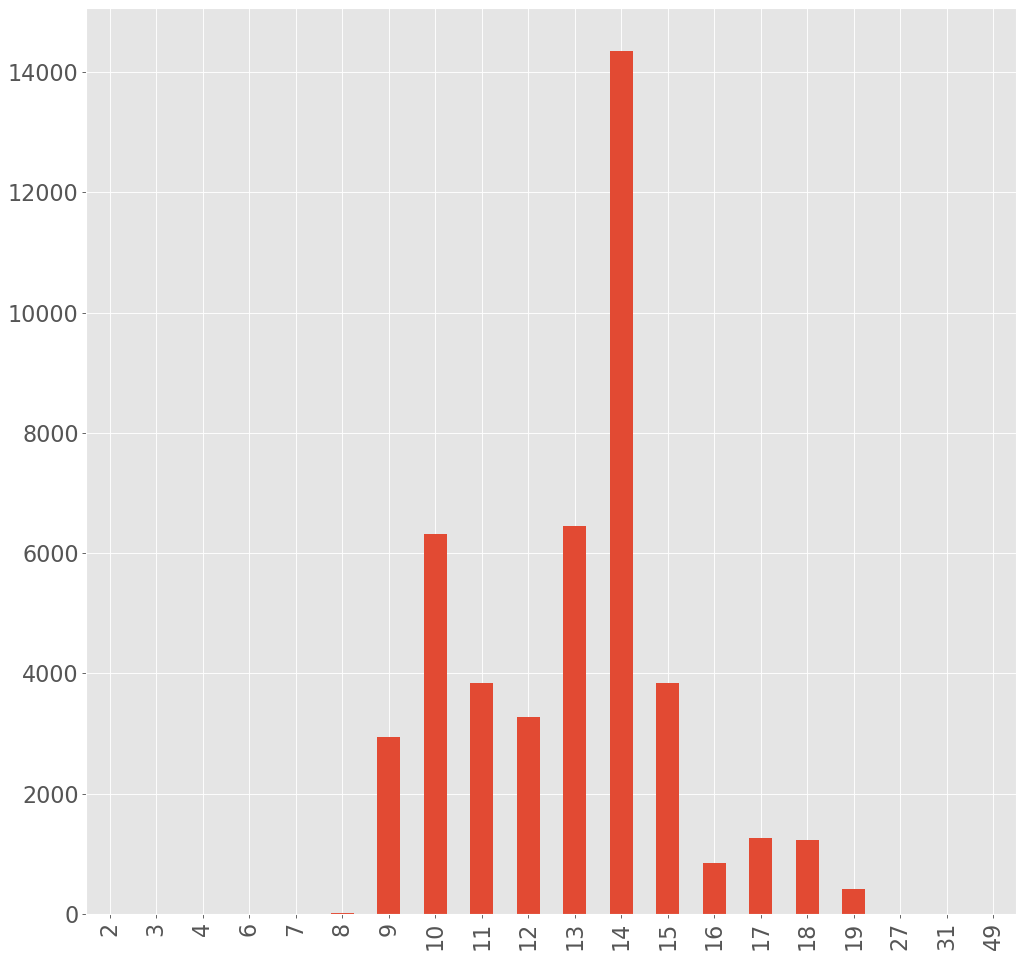

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])
plt.style.use('ggplot')
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
df_covid_janssen['ONSET_DATE'].groupby(df_covid_janssen["ONSET_DATE"].dt.week).count().plot(kind="bar")
plt.xlabel("")
#plt.ylabel(" ")
#plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Tables\xarelt\xarelto_hist_2015-2019.jpg", bbox_inches='tight', pad_inches=0)
plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\output_for_paper\lda_tp10\20210608\janssen_advereeventsa-by_week2021.png")

<ipython-input-142-033cbc665a1f>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_covid_moderna['ONSET_DATE'].groupby(df_covid_moderna["ONSET_DATE"].dt.week).count().plot(kind="bar")


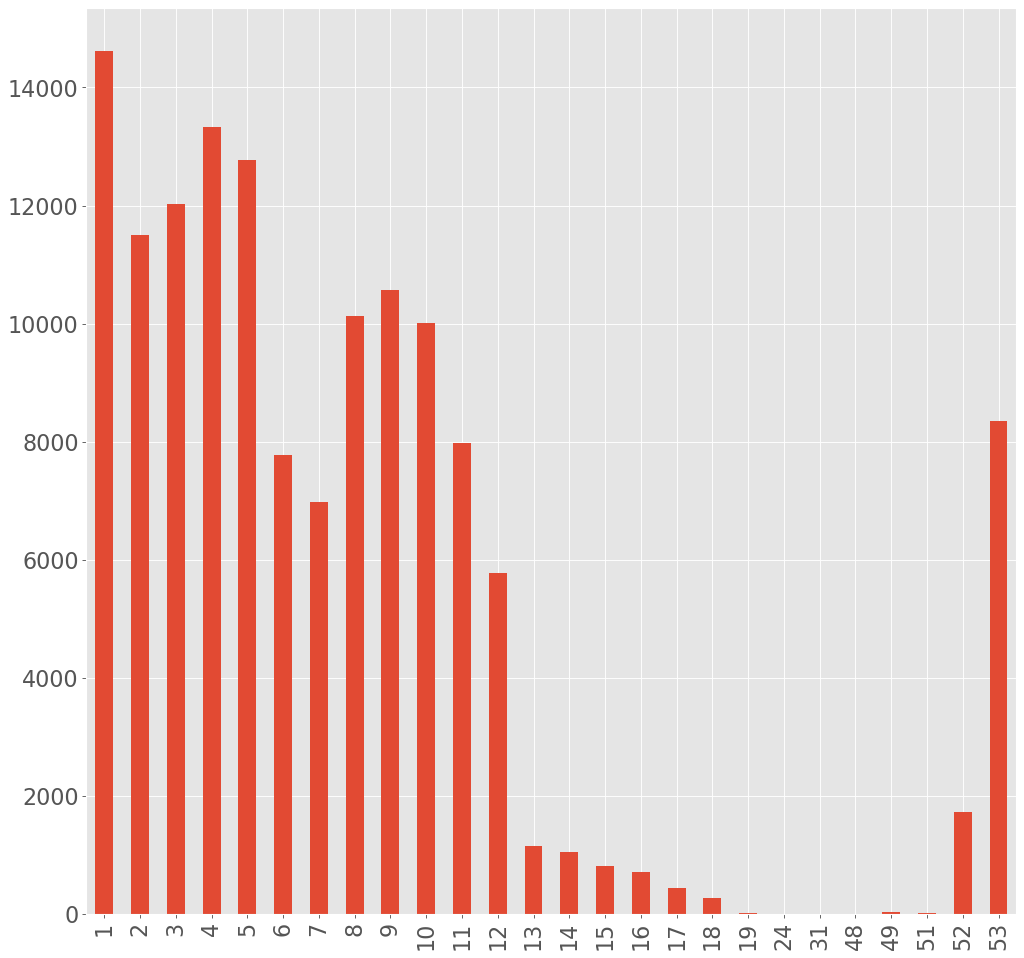

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])
plt.style.use('ggplot')
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
df_covid_moderna['ONSET_DATE'].groupby(df_covid_moderna["ONSET_DATE"].dt.week).count().plot(kind="bar")
plt.xlabel("")
#plt.ylabel(" ")
#plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Tables\xarelt\xarelto_hist_2015-2019.jpg", bbox_inches='tight', pad_inches=0)
plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\output_for_paper\lda_tp10\20210608\moderna_advereeventsa-by_week2021.png")

<ipython-input-143-638b1486ea41>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_covid_pfizer['ONSET_DATE'].groupby(df_covid_pfizer["ONSET_DATE"].dt.week).count().plot(kind="bar")


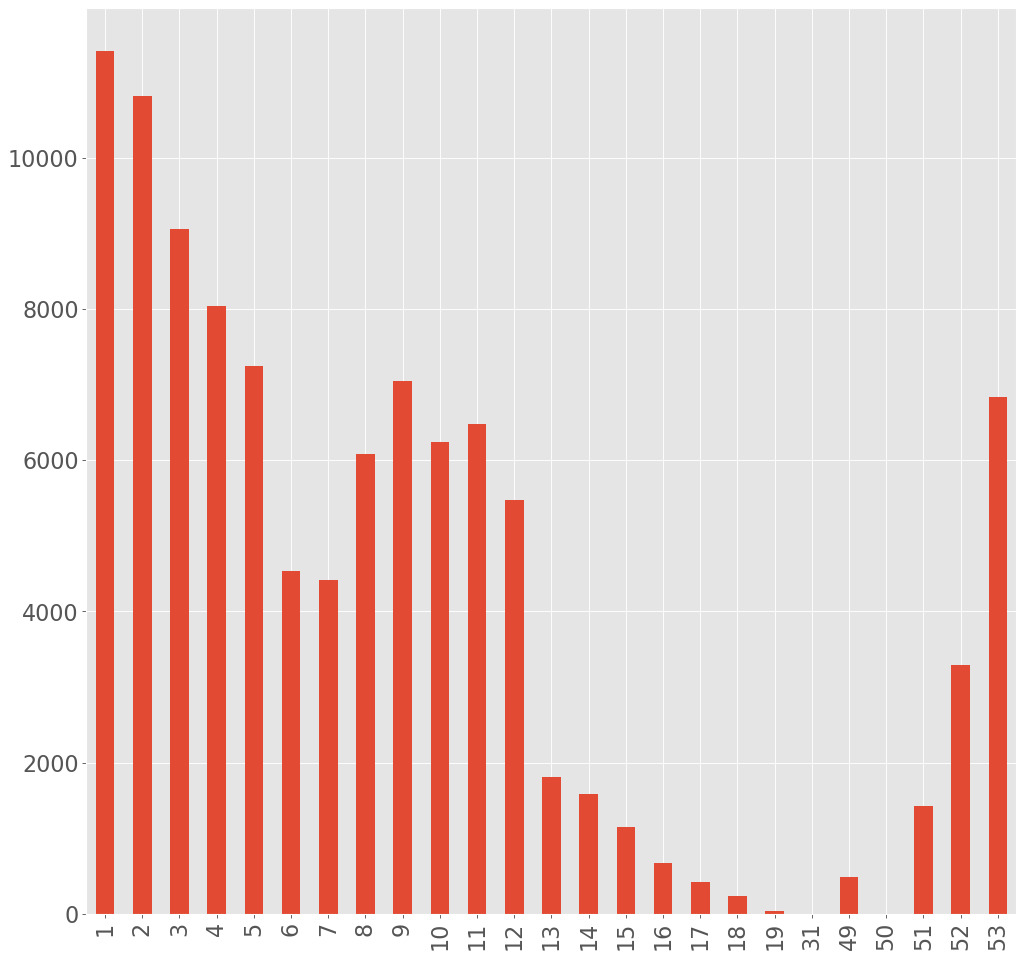

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])
plt.style.use('ggplot')
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
df_covid_pfizer['ONSET_DATE'].groupby(df_covid_pfizer["ONSET_DATE"].dt.week).count().plot(kind="bar")
plt.xlabel("")
#plt.ylabel(" ")
#plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Tables\xarelt\xarelto_hist_2015-2019.jpg", bbox_inches='tight', pad_inches=0)
plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\output_for_paper\lda_tp10\20210608\pfizer_advereeventsa-by_week2021.png")

In [144]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297410 entries, 154572 to 300915
Data columns (total 56 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   VAERS_ID         297410 non-null  int64         
 1   RECVDATE         297410 non-null  object        
 2   STATE            297410 non-null  object        
 3   AGE_YRS          297410 non-null  float64       
 4   CAGE_YR          297410 non-null  float64       
 5   CAGE_MO          297410 non-null  float64       
 6   SEX              297410 non-null  object        
 7   RPT_DATE         297410 non-null  object        
 8   SYMPTOM_TEXT     297410 non-null  object        
 9   DIED             297410 non-null  object        
 10  DATEDIED         297410 non-null  object        
 11  L_THREAT         297410 non-null  object        
 12  ER_VISIT         297410 non-null  object        
 13  HOSPITAL         297410 non-null  object        
 14  HOSPDAYS       